In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

Dataset shape: (44785, 41)

First 5 rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498



Missing values per column:
new_tests                          29138
new_tests_per_thousand             29138
total_tests_per_thousand           28763
total_tests                        28763
tests_per_case                     28636
positive_rate                      28252
new_tests_smoothed                 27217
new_tests_smoothed_per_thousand    27217
tests_units                        26411
handwashing_facilities             26127
extreme_poverty                    18463
male_smokers                       13822
female_smokers                     13427
hospital_beds_per_thousand          8646
stringency_index                    7728
human_development_index             6227
aged_65_older                       5425
gdp_per_capita                      5343
aged_70_older                       5040
median_age                          4833
dtype: int64


In [41]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill missing values
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)

# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Filter out non-country entries (e.g., 'World', 'Asia')
countries = df[~df['location'].isin(['World', 'Asia', 'Africa', 'Europe', 'North America', 'South America'])]

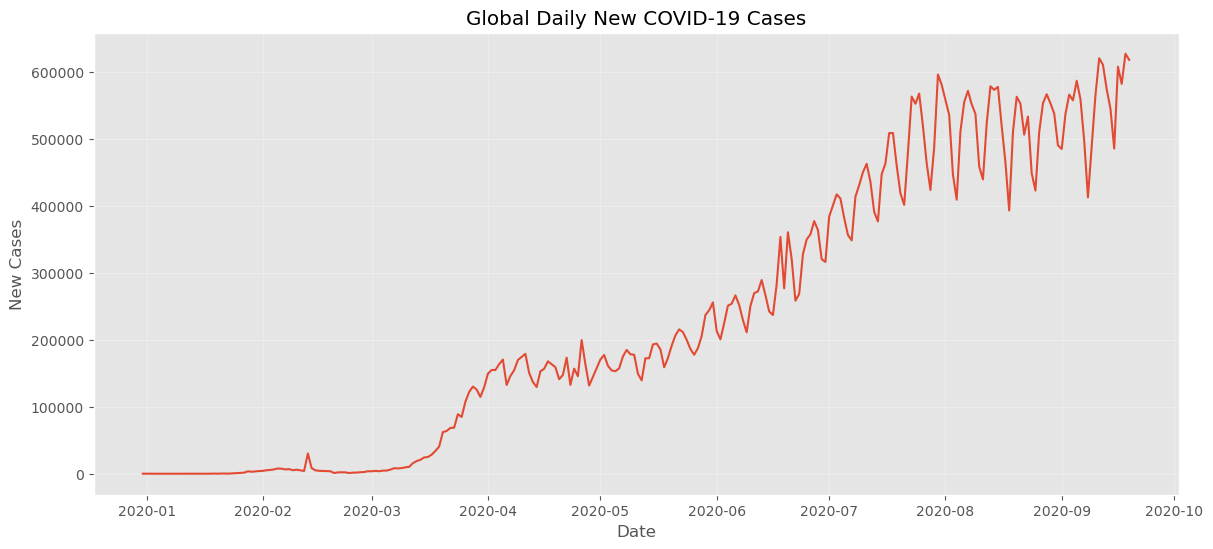

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby('date')['new_cases'].sum().reset_index(), x='date', y='new_cases')
plt.title("Global Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True, alpha=0.3)
plt.show()

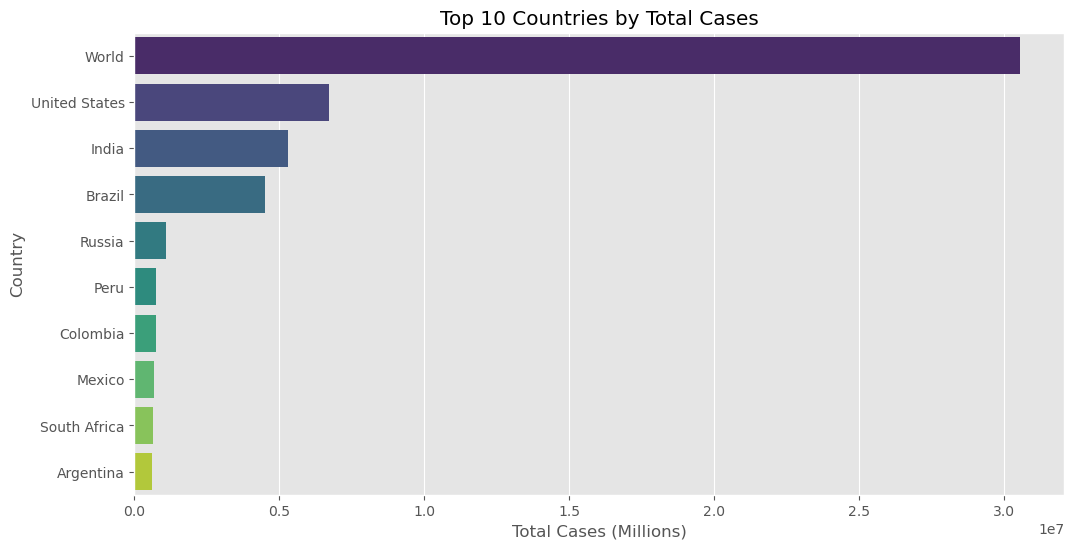

In [17]:
latest_data = df[df['date'] == df['date'].max()]
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_countries, palette='viridis')
plt.title("Top 10 Countries by Total Cases")
plt.xlabel("Total Cases (Millions)")
plt.ylabel("Country")
plt.show()

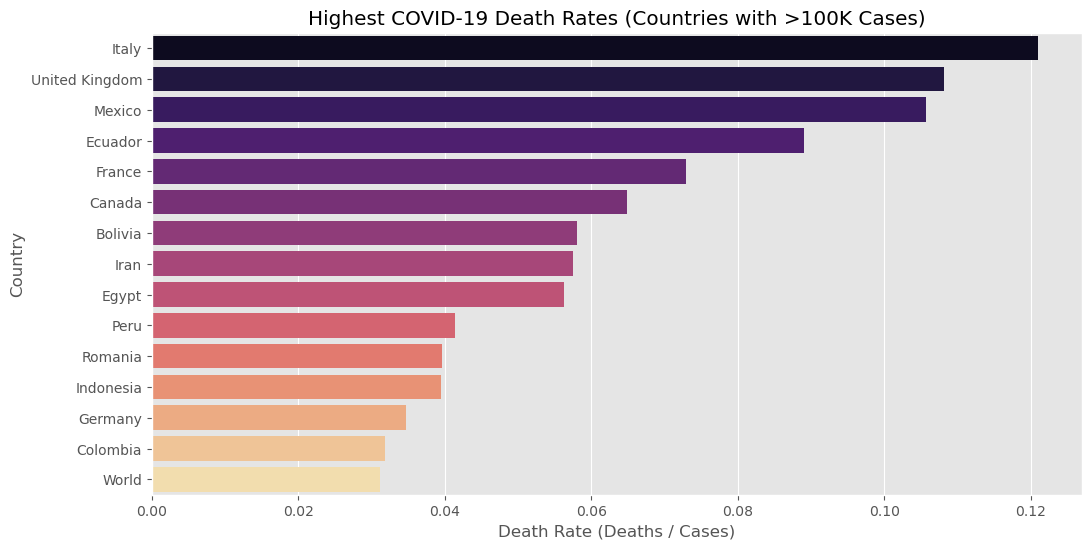

In [23]:
death_rate = latest_data[latest_data['total_cases'] > 100000].sort_values('death_rate', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='death_rate', y='location', data=death_rate, palette='magma')
plt.title("Highest COVID-19 Death Rates (Countries with >100K Cases)")
plt.xlabel("Death Rate (Deaths / Cases)")
plt.ylabel("Country")
plt.show()

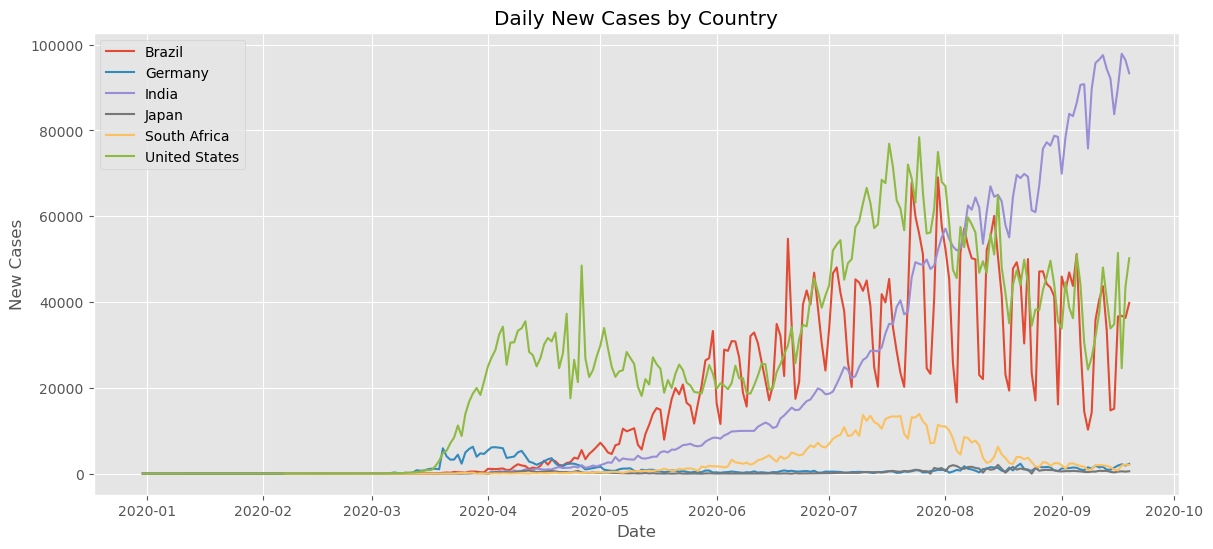

In [24]:
countries = ['United States', 'India', 'Brazil', 'Germany', 'South Africa', 'Japan']
filtered = df[df['location'].isin(countries)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered, x='date', y='new_cases', hue='location')
plt.title("Daily New Cases by Country")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

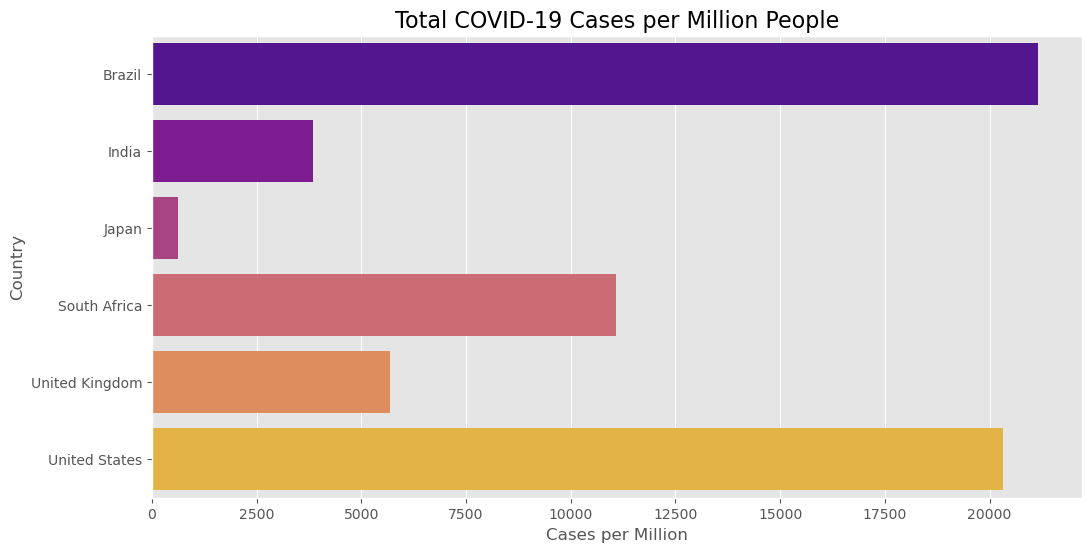

In [8]:
# Compare cases per million for selected countries
countries_to_compare = ['United States', 'India', 'Brazil', 'United Kingdom', 'South Africa', 'Japan']
cases_per_million = latest_data[latest_data['location'].isin(countries_to_compare)]

plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases_per_million', y='location', data=cases_per_million, palette='plasma')
plt.title('Total COVID-19 Cases per Million People', fontsize=16)
plt.xlabel('Cases per Million', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

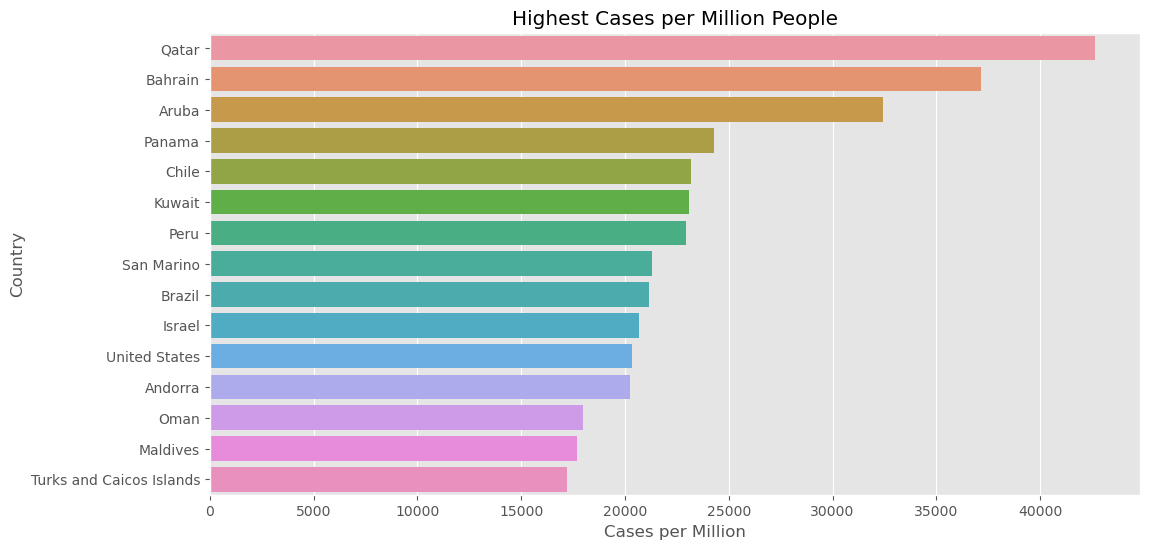

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases_per_million', y='location', data=latest_data.sort_values('total_cases_per_million', ascending=False).head(15))
plt.title("Highest Cases per Million People")
plt.xlabel("Cases per Million")
plt.ylabel("Country")
plt.show()

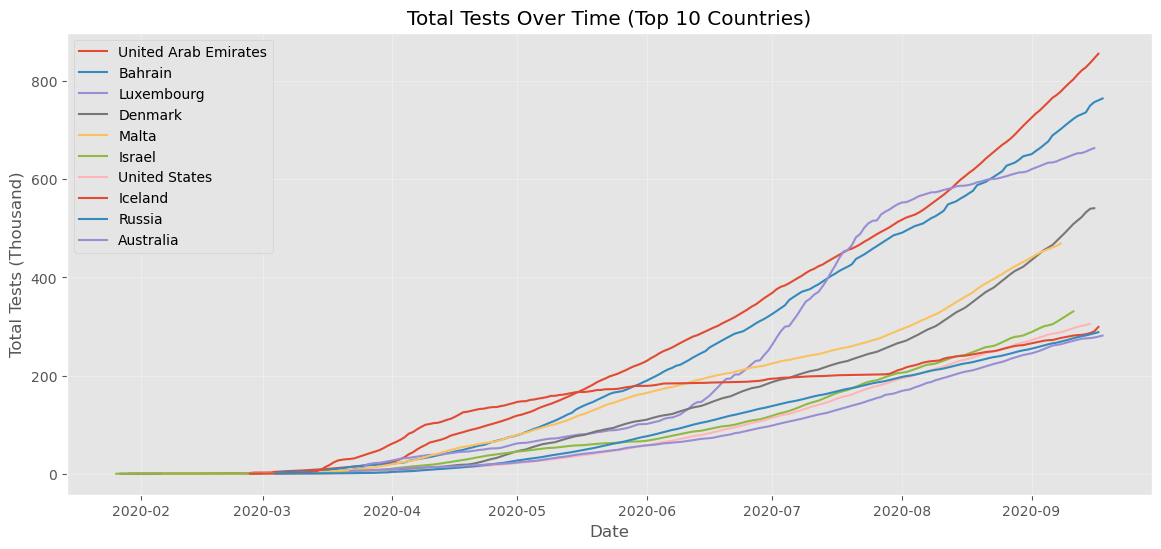

In [39]:
vaccine_data = df[df['total_tests_per_thousand'].notna()]
top_vaccinated = vaccine_data.groupby('location')['total_tests_per_thousand'].max().sort_values(ascending=False).head(10).index

plt.figure(figsize=(14, 6))
for country in top_vaccinated:
    country_data = vaccine_data[vaccine_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_tests_per_thousand'], label=country)

plt.title("Total Tests Over Time (Top 10 Countries)")
plt.xlabel("Date")
plt.ylabel("Total Tests (Thousand)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

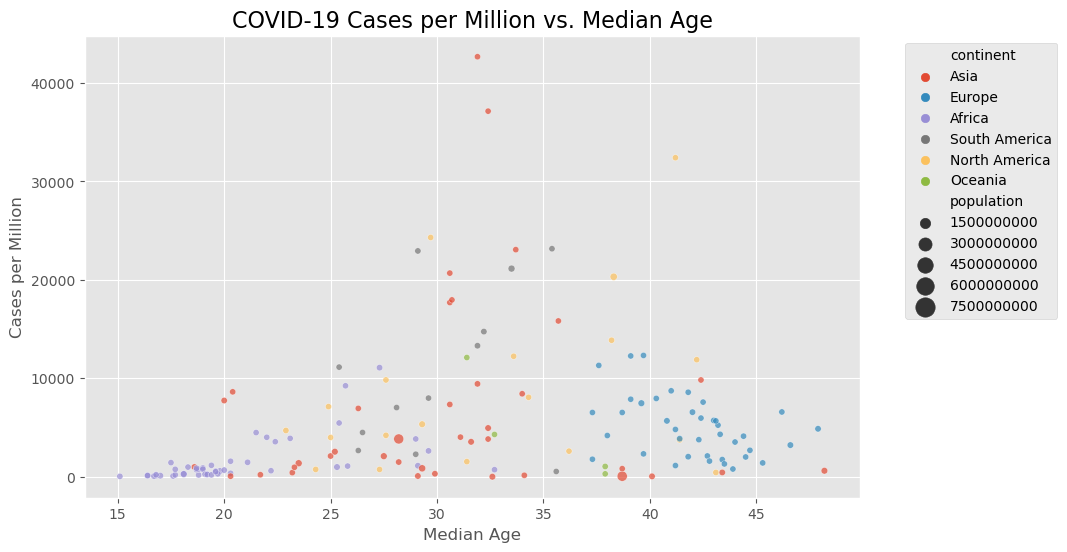

In [11]:
latest_vaccine = latest_data[latest_data['people_fully_vaccinated_per_hundred'].notna()]
latest_vaccine = latest_vaccine.sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='people_fully_vaccinated_per_hundred', y='location', data=latest_vaccine, palette='rocket')
plt.title("% Fully Vaccinated Population (Top 15 Countries)")
plt.xlabel("% Fully Vaccinated")
plt.ylabel("Country")
plt.show()

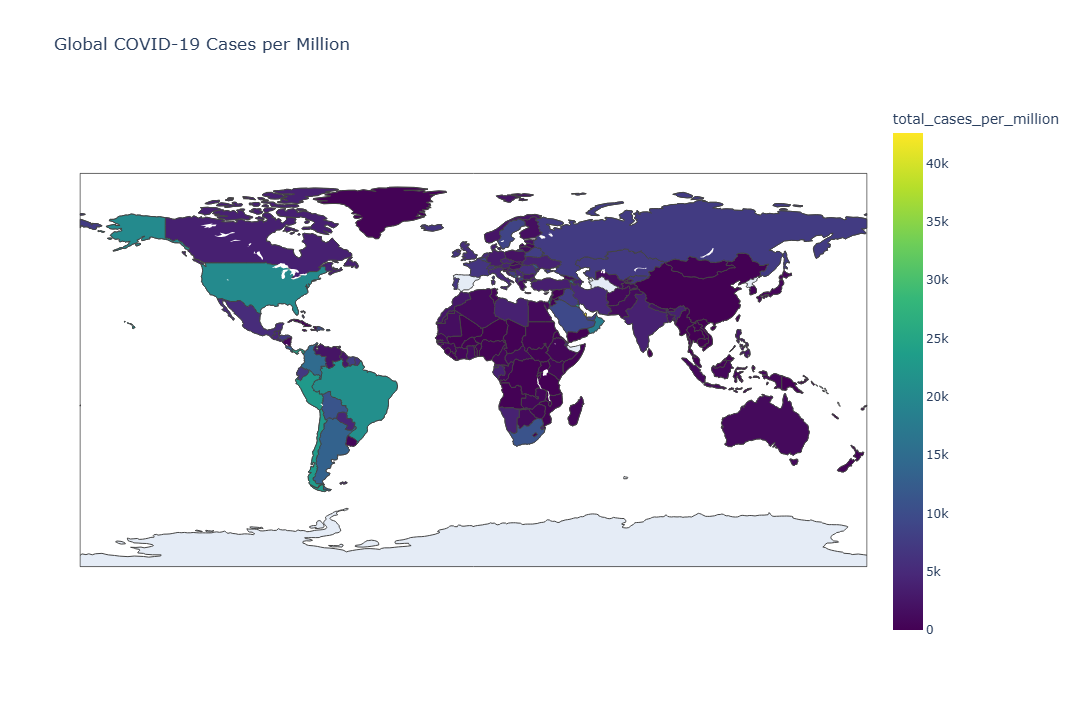

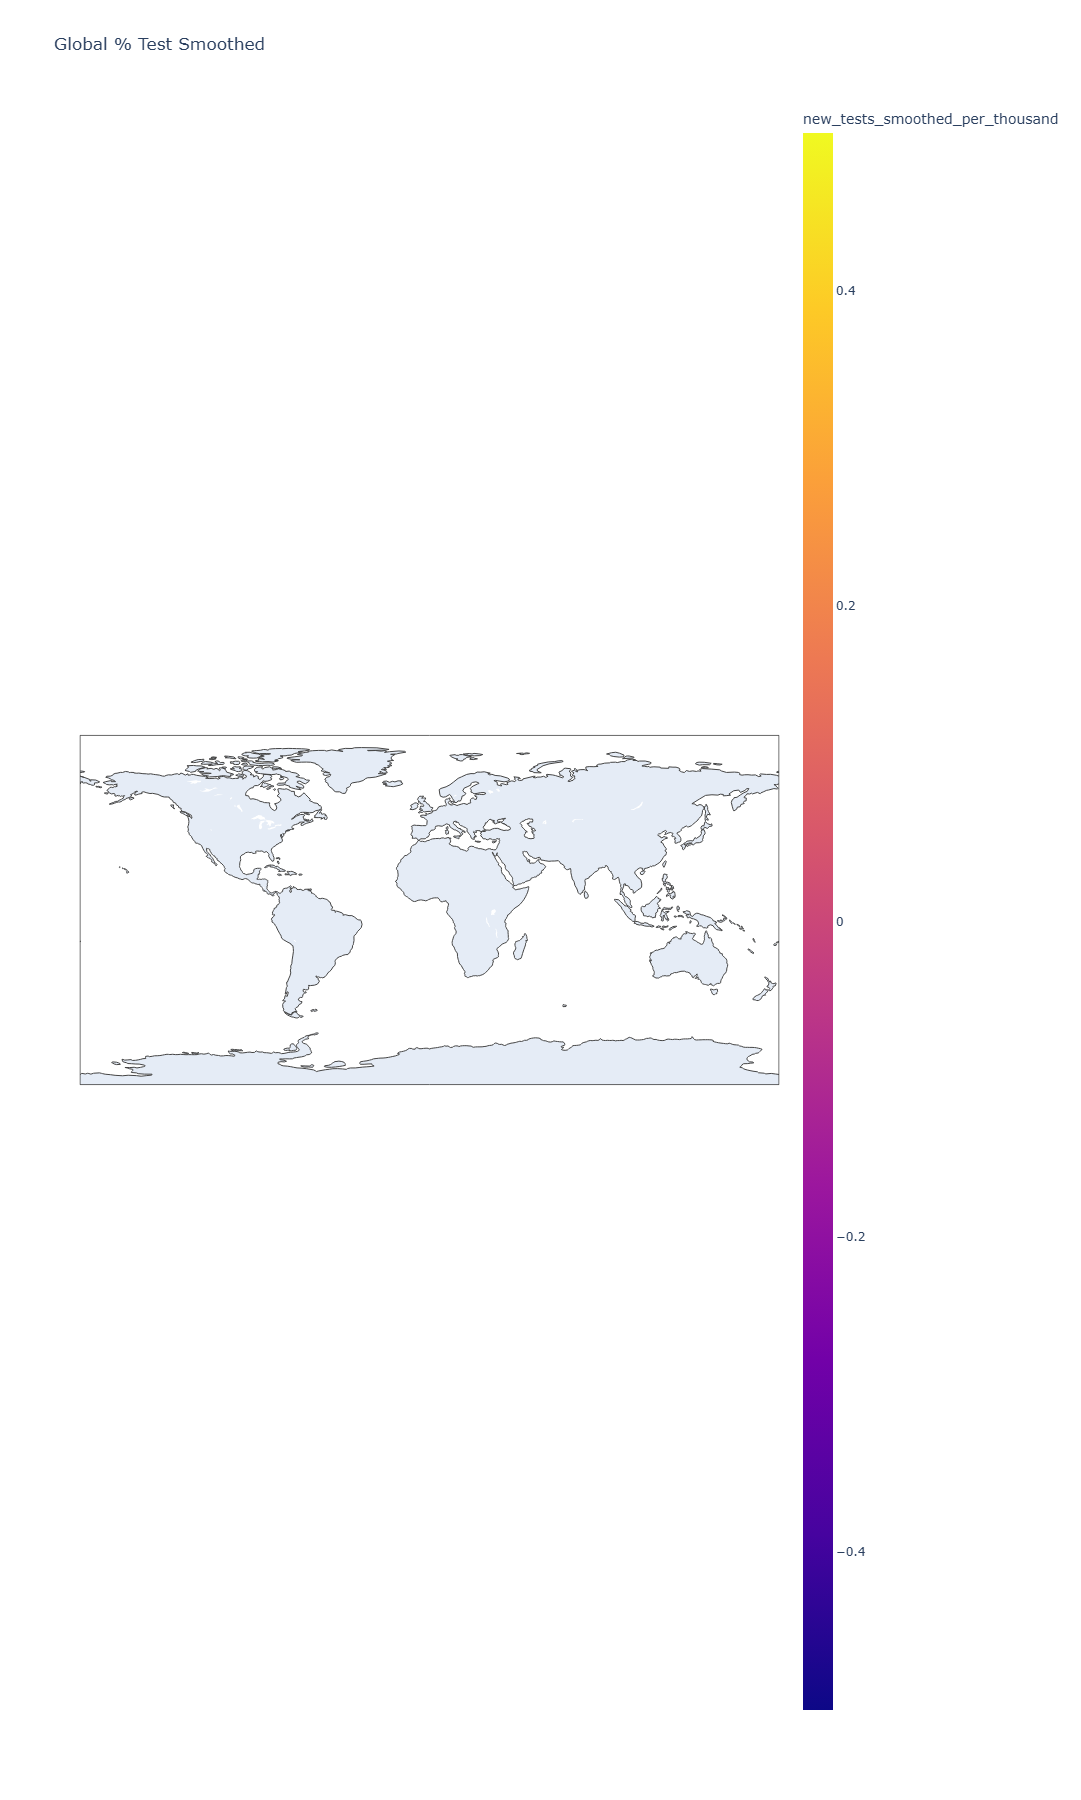

In [ ]:
# Cases per million
fig = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases_per_million",
    hover_name="location",
    title="Global COVID-19 Cases per Million",
    color_continuous_scale="Viridis"
)
fig.show()

# Vaccination rates
fig = px.choropleth(
    latest_data,
    locations="iso_code",
    color="new_tests_smoothed_per_thousand",
    hover_name="location",
    title="Global % Test Smoothed",
    color_continuous_scale="Plasma"
)
fig.show()